### Developing a classification model which can be used by the bank in identifying the potential customers who would opt for the bank's marketing offering or not, based on the feature attributes:


## Feature attributes:

1. <b>age</b> | int64 | age in years
2. <b>job</b> | object | type of job (categorical: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar' 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed' 'student'])
3. <b>marital</b> | object | marital status (categorical: ['married' 'single' 'divorced'])
4. <b>education</b> | Object | education background (categorical: ['secondary' 'tertiary' 'primary' 'unknown'])
5. <b>default</b> | Object | has credit in default? (categorical: ['no' 'yes'])
6. <b>balance</b> | int64 | Balance of the individual
7. <b>housing</b> | object | has housing loan? (categorical: ['yes' 'no'])
8. <b>loan</b> | object | has personal loan? (categorical: ['no' 'yes'])
9. <b>contact</b> | object | contact communication type (categorical: ['unknown' 'cellular' 'telephone'])
10. <b>day</b> | int64 | last contact day of the week (numeric: days in a month from 1 to 31)
11. <b>month</b> | object | last contact month of year (categorical: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'])
12. <b>duration</b> | int64 | last contact duration, in seconds (numeric)
13. <b>campaign</b> | int64 | number of contacts performed during this campaign and for this client
14. <b>pdays</b> | int64 | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
15. <b>previous</b> | int64 | number of contacts performed before this campaign and for this client
16. <b>poutcome</b> | object | outcome of the previous marketing campaign (categorical: ['unknown' 'other' 'failure' 'success'])

## Label:

1. <b>y</b> | object | deposit - has the customer opted the bank's offering or not? (binary: 'yes','no')

## IMPORTS:

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import seaborn as sns
import collections
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
import csv

#feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#feature splitting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


#Basic Filter Methods
from sklearn.feature_selection import VarianceThreshold

#metric scores
from sklearn.metrics import roc_auc_score,balanced_accuracy_score, roc_curve, make_scorer, classification_report,confusion_matrix, accuracy_score, f1_score, cohen_kappa_score, matthews_corrcoef, log_loss, auc
from sklearn.model_selection import cross_val_score, cross_validate
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.datasets import make_classification

#ML algorithm models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB, CategoricalNB, ComplementNB

#NEW ML MODELS
from sklearn.neural_network import MLPClassifier 

#feature selection algorithms
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

#wrapper selection algorithms
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#Imbalanced datasets
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

#hyperparameter tuning
from KUtils.classifier import generic_classifier_utils as gcu
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline

#Ensembles
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

#Boosting
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [2]:
with open(r"bank.csv") as in_file, open(r"bank1.csv", 'w') as out_file:
    semicolonin = csv.reader(in_file, delimiter=';')
    commaout = csv.writer(out_file, delimiter=',')
    for row in semicolonin:
        commaout.writerow(row)

In [3]:
# pd.options.display.max_columns = None #display all the columns into the output cell.
# pd.options.display.max_rows = None #display all the rows into the output cell.

missing_values = ["n/a", "na", "--", "?", " ", " ?"]
df = pd.read_csv('bank1.csv', na_values = missing_values)

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
df.shape

(4521, 17)

In [129]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(4521, 17)

<AxesSubplot:>

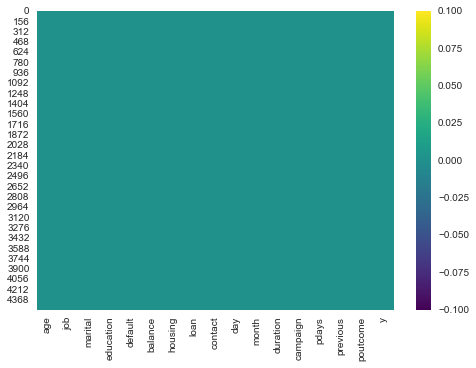

In [10]:
sns.heatmap(df.isnull(), cmap='viridis')

In [11]:
df.isnull().sum().sum()

0

## DATA VISUALIZATIONS & ANALYSIS

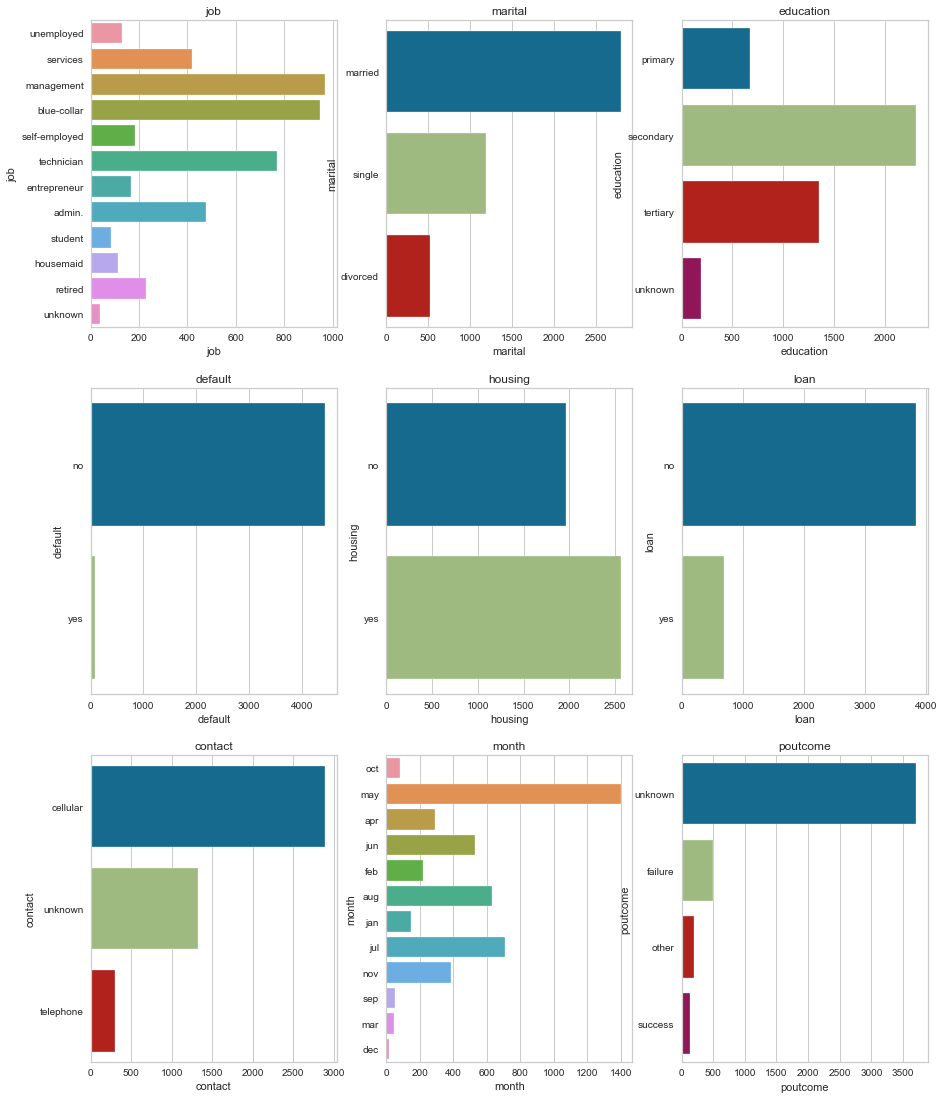

In [111]:
#check count based on categorical features

categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]

plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

#### Analysis:

* client with job type as management records are high in given dataset and the unknown are very less
* client who married are high in records in given dataset and divorced are less
* client whoes education background is secondary are in high numbers in given dataset
* defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which we can drop
* data in month of may is high and less in dec

In [15]:
#Creating a copy of the dataset
df3 = df.copy()

In [16]:
df3.drop(['default'],axis=1, inplace=True)

In [17]:
#Numerical, Discrete and Continuous features
numerical_features = [feature for feature in df3.columns if ((df3[feature].dtypes != 'O') & (feature not in ['y']))]
discrete_feature=[feature for feature in numerical_features if len(df3[feature].unique())<20]
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
continuous_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

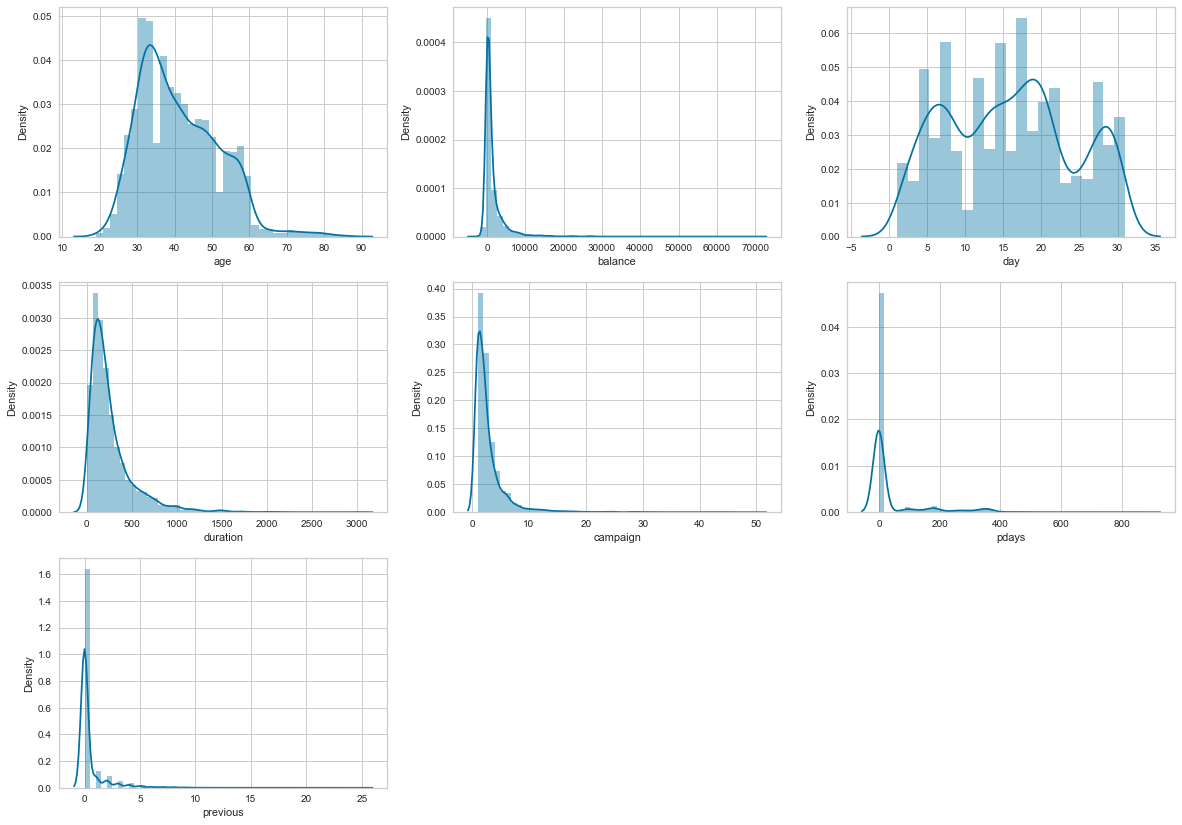

In [18]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df3[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show() 

#### Analysis:

* it seems age and day are distributed normally
* balance, duration, compaign, pdays and previous seems heavily skewed towards left and seems to be have some outliers.

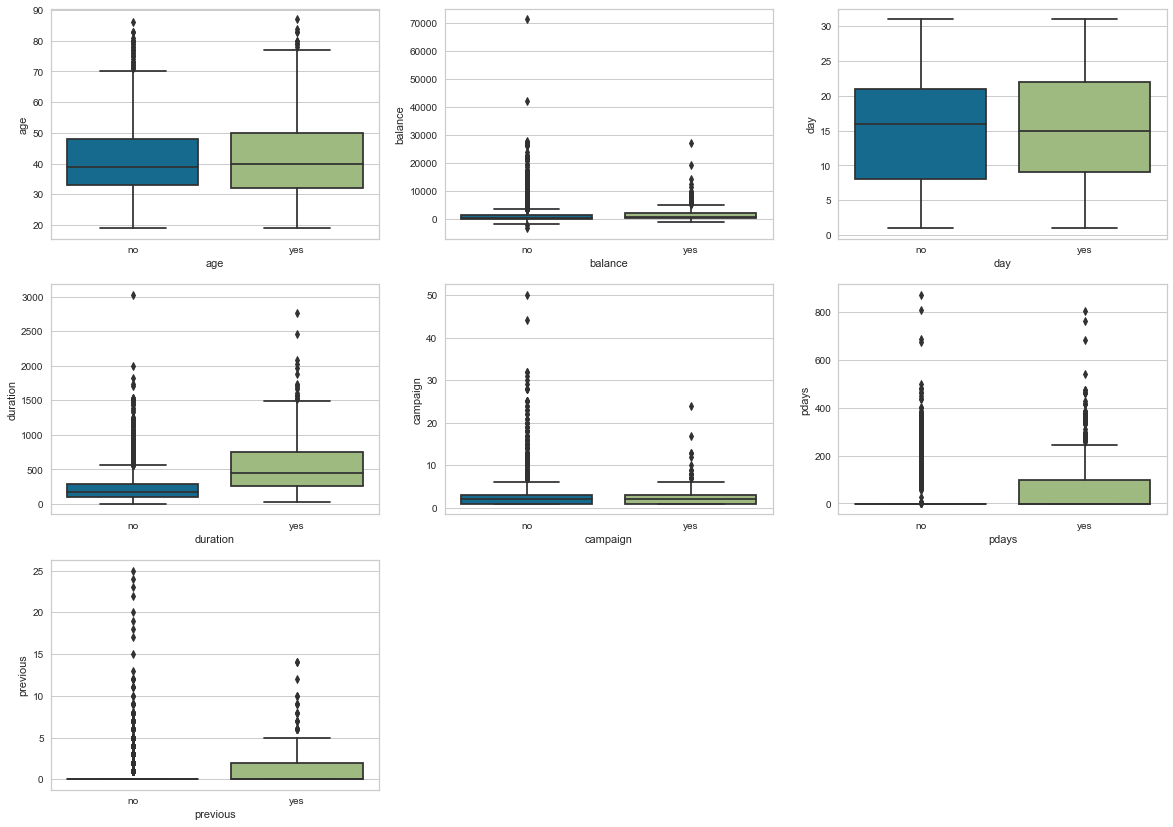

In [19]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df3[feature], data=df3)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

#### Analysis:

* client shows interest in the offering who had discussion for longer duration

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

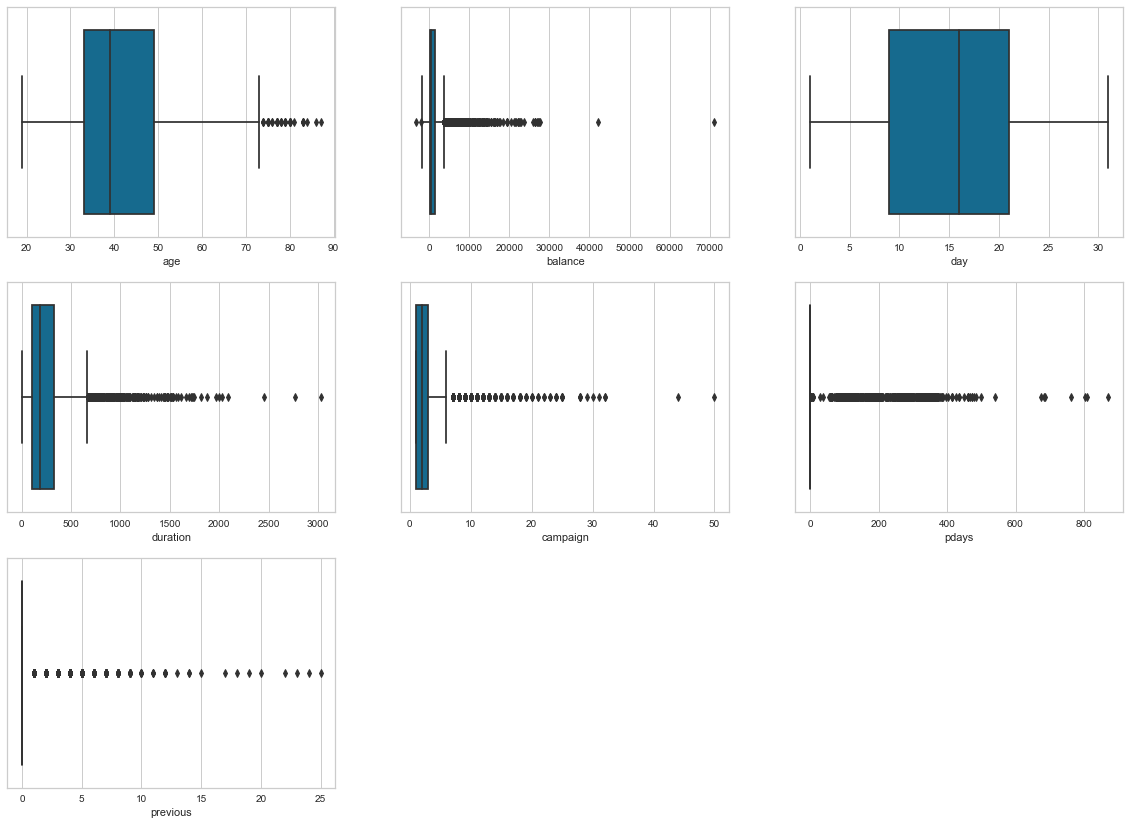

In [20]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df3[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [21]:
df3.shape

(4521, 16)

#### Analysis:

* age, balance, duration, compaign, pdays and previous has some outliers

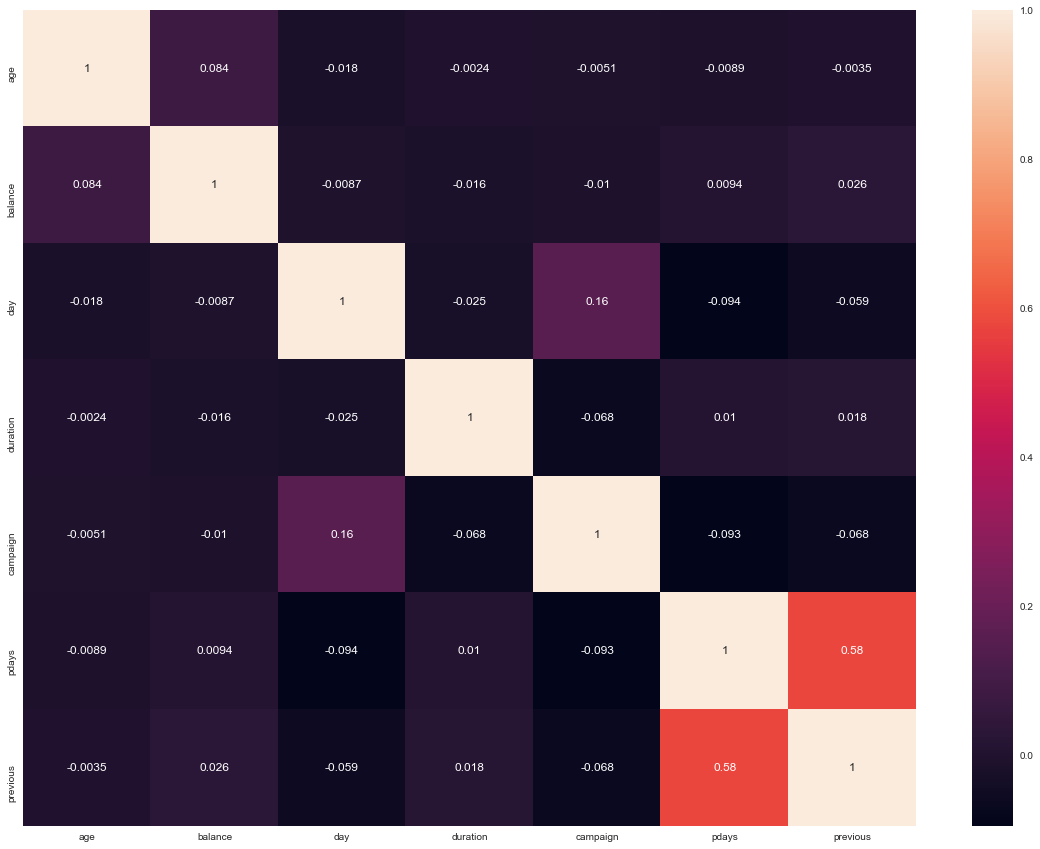

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(df3.corr(), annot=True)
plt.show()

#### Analysis:

* it seems no feature is heavily correlated with other features

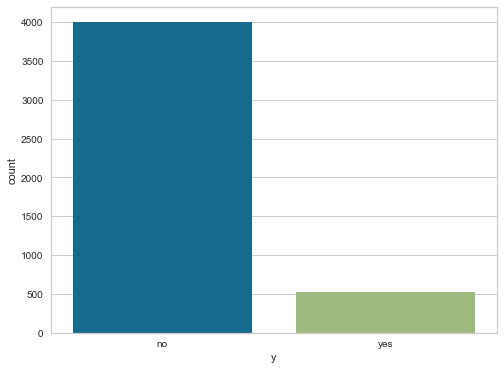

In [23]:
# Total customers count based on the target variable
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x='y',data=df3)
plt.show()

#### Analysis:

* It is clear that the dataset is imbalanced

In [24]:
df3.groupby(['y','pdays']).size()

y    pdays
no   -1       3368
      2          7
      3          1
      5          1
      7          3
      28         1
      58         1
      59         1
      61         1
      62         1
      69         1
      74         1
      75         1
      76         1
      77         1
      78         3
      79         1
      80         1
      81         1
      82         1
      83         1
      84         3
      85         5
      87         4
      88         2
      89         1
      90         2
      91         6
      92         1
      93         3
      94         5
      95         2
      96         3
      97         2
      99         4
      100        1
      101        2
      102        2
      103        1
      104        3
      105        4
      106        2
      107        3
      109        1
      110        2
      111        3
      112        4
      113        2
      114        2
      115        1
      116        2
      117        1
 

In [25]:
# drop pdays as it has -1 value for around 40%+ 
df3.drop(['pdays'],axis=1, inplace=True)

In [26]:
df3.shape

(4521, 15)

In [27]:
#numerical_features.remove('pdays')
numerical_features.remove('pdays')

In [28]:
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'previous']

## ENCODING

In [29]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df3 = pd.concat([df3.drop(col, axis=1),pd.get_dummies(df3[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [30]:
bool_columns = ['housing', 'loan', 'y']
for col in  bool_columns:
    df3[col+'_new']=df3[col].apply(lambda x : 1 if x == 'yes' else 0)
    df3.drop(col, axis=1, inplace=True)

In [31]:
df3.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,y_new
0,30,1787,19,79,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,33,4789,11,220,1,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
2,35,1350,16,185,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,30,1476,3,199,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0
4,59,0,5,226,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0


In [32]:
df3.to_csv('bank_final.csv', index=None)

## TRAIN TEST SPLIT

In [33]:
X = df3.drop(labels=['y_new'], axis=1)
y = df3['y_new']

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.35, random_state=0)

#Creating copies
X_train_org=X_train.copy()

X_test_org=X_test.copy()

X_train.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new
3346,55,865,27,96,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2724,48,5095,16,71,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
764,28,0,5,335,2,8,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4337,73,519,16,434,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1292,49,1091,30,47,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


# Feature Scaling

In [34]:
stand = StandardScaler()

stand = stand.fit(X_train)

X_train = stand.fit_transform(X_train)
X_test = stand.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns=X_train_org.columns)

X_test = pd.DataFrame(X_test, columns=X_test_org.columns)


In [35]:
X_train.shape

(2938, 40)

In [36]:
Y_train.unique()

array([0, 1], dtype=int64)

In [37]:
Y_train.value_counts()

0    2610
1     328
Name: y_new, dtype: int64

# Mutual information

* It is a measure of the mutual dependence of two variables. Entropy signifies the amount of information within a variable.
* The mutual information between two variables, measures how much a given feature can explain another (target)

In [38]:
i_scores = mutual_info_classif(X_train.values, Y_train.values)

IG_DF = pd.DataFrame(i_scores,index = X_train.columns, columns =['I-Gain'])
IG_DF.sort_values(by=['I-Gain'],ascending=False,inplace=True)
IG_DF.head()

,I-Gain
duration,0.070854
poutcome_success,0.019319
previous,0.019026
day,0.016616
poutcome_unknown,0.015738


# MACHINE LEARNING MODELS

In [55]:
def plot_roc(model):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Customer-bank marketing offering prediction', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.7, y = 0.02, s = ('AUC Score:',round(roc_auc_score(Y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

f1scores={}

# KNN

F1 SCORE: KNN 0.3773584905660377
Cohen Kappa: KNN 0.31135201167103155
CR Report: KNN 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1390
           1       0.48      0.31      0.38       193

    accuracy                           0.87      1583
   macro avg       0.69      0.63      0.65      1583
weighted avg       0.86      0.87      0.86      1583

MCC: KNN 0.32044291904350775
Accuracy: KNN 0.8749210360075805
Balanced Accuracy: KNN 0.6320591195437433
Cross Validation: KNN


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    3.5s remaining:    2.3s


Cross Val F1 score: KNN 0.27460034659170146


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


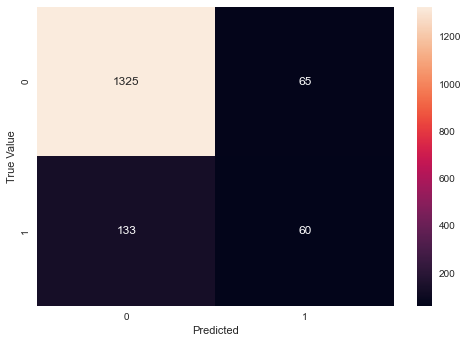

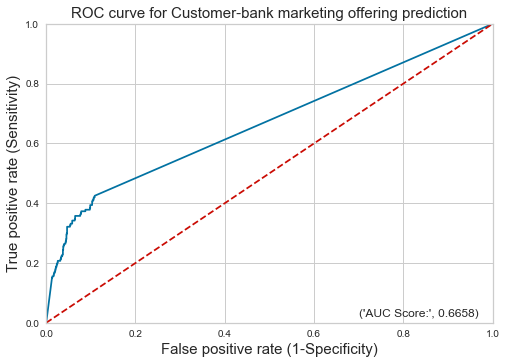

In [56]:
knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2, p=11, weights='distance')
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)

#Evaluation metrics
print("F1 SCORE: KNN",f1_score(Y_test, y_pred_knn))
print("Cohen Kappa: KNN",cohen_kappa_score(Y_test, y_pred_knn))
print("CR Report: KNN \n",classification_report(Y_test, y_pred_knn))
print("MCC: KNN",matthews_corrcoef(Y_test, y_pred_knn))
print("Accuracy: KNN",accuracy_score(Y_test, y_pred_knn))
print("Balanced Accuracy: KNN",balanced_accuracy_score(Y_test, y_pred_knn))

f1scores['KNN']=f1_score(Y_test, y_pred_knn)

#Cross Val Score
print("Cross Validation: KNN")
cross = cross_validate(knn, X, y, cv=10, n_jobs=-1, verbose=1, scoring='f1')
print("Cross Val F1 score: KNN",cross['test_score'].mean())

#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_knn)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#ROC Curve
plot_roc(knn)
plt.show()

## XGB & RANDOM FOREST CLASSIFIER

In [57]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [58]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=10,scoring='f1', verbose=1)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_,
        'best_estimator' : model_selection.best_estimator_
    })

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   42.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fitting 10 folds for each of 64 candidates, totalling 640 fits
[18:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:

[18:44:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:44:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:44:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:45:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:46:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:46:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:47:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed:  3.8min finished


In [59]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.053207620815106126,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 10},
  'best_estimator': RandomForestClassifier(max_depth=3, n_estimators=10)},
 {'model': 'XGBClassifier',
  'best_score': 0.49840728564009734,
  'best_params': {'learning_rate': 0.001, 'max_depth': 20, 'n_estimators': 10},
  'best_estimator': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.001, max_delta_step=0, max_depth=20,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters=1, ve

[18:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 SCORE: XGBClassifier 0.48024316109422494
Cohen Kappa: XGBClassifier 0.4219802652510831
CR Report: XGBClassifier 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1390
           1       0.58      0.41      0.48       193

    accuracy                           0.89      1583
   macro avg       0.75      0.68      0.71      1583
weighted avg       0.88      0.89      0.88      1583

MCC: XGBClassifier 0.43003789726915975
Accuracy: XGBClassifier 0.8919772583701832
Balanced Accuracy: XGBClassifier 0.684159615312931
Cross Validation: XGBClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


Cross Val F1 score: XGBClassifier 0.49840728564009734


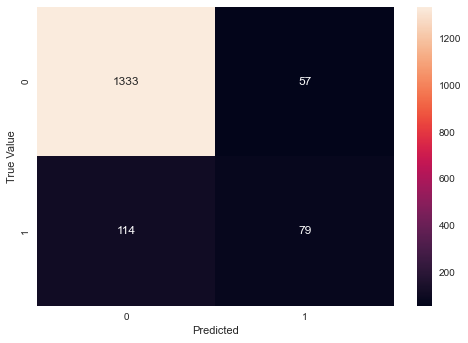

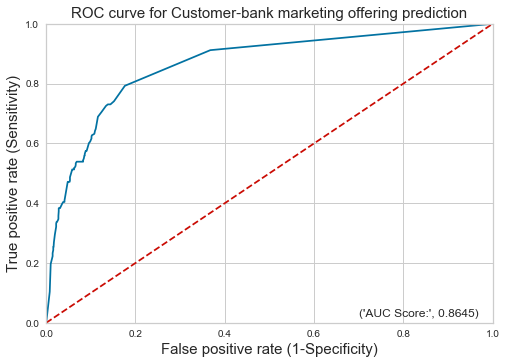

In [60]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.001, max_delta_step=0, max_depth=20,
                min_child_weight=1, monotone_constraints='()',
                n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None)
model_xgb.fit(X_train,Y_train)
y_pred_xgb = model_xgb.predict(X_test)

#Evaluation metrics
print("F1 SCORE: XGBClassifier",f1_score(Y_test, y_pred_xgb))
print("Cohen Kappa: XGBClassifier",cohen_kappa_score(Y_test, y_pred_xgb))
print("CR Report: XGBClassifier \n",classification_report(Y_test, y_pred_xgb))
print("MCC: XGBClassifier",matthews_corrcoef(Y_test, y_pred_xgb))
print("Accuracy: XGBClassifier",accuracy_score(Y_test, y_pred_xgb))
print("Balanced Accuracy: XGBClassifier",balanced_accuracy_score(Y_test, y_pred_xgb))

f1scores['XGBClassifier']=f1_score(Y_test, y_pred_xgb)

#Cross Val Score
print("Cross Validation: XGBClassifier")
cross = cross_validate(model_xgb, X, y, cv=10, n_jobs=-1, verbose=1, scoring='f1')
print("Cross Val F1 score: XGBClassifier",cross['test_score'].mean())

#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_xgb)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#ROC Curve
plot_roc(model_xgb)
plt.show()

## RANDOM FOREST CLASSIFIER

F1 SCORE: RANDOM FOREST CLASSIFIER 0.31782945736434115
Cohen Kappa: RANDOM FOREST CLASSIFIER 0.2731788252235706
CR Report: RANDOM FOREST CLASSIFIER 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1390
           1       0.63      0.21      0.32       193

    accuracy                           0.89      1583
   macro avg       0.77      0.60      0.63      1583
weighted avg       0.87      0.89      0.86      1583

MCC: RANDOM FOREST CLASSIFIER 0.3218136269676733
Accuracy: RANDOM FOREST CLASSIFIER 0.8888186986734049
Balanced Accuracy: RANDOM FOREST CLASSIFIER 0.597584523055131
Important features: RFC [0.0890806  0.09434577 0.08439519 0.27985687 0.04387261 0.03157709
 0.01234299 0.00437212 0.00378349 0.01110291 0.00922228 0.00554456
 0.00710639 0.00527253 0.01175865 0.00377248 0.0020403  0.01649832
 0.01250383 0.0146766  0.01541982 0.004274   0.00885278 0.02207414
 0.01197825 0.00252022 0.00937145 0.00458929 0.01230226 0.00930953

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.8s remaining:    0.5s


Cross Val F1 score: RANDOM FOREST CLASSIFIER 0.3525480137587026


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished


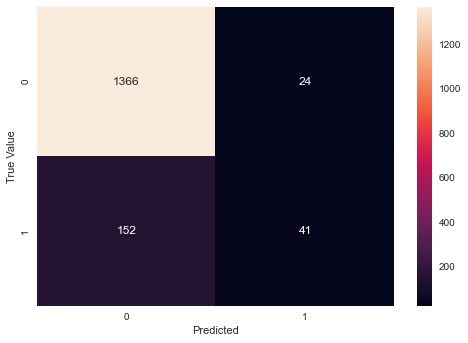

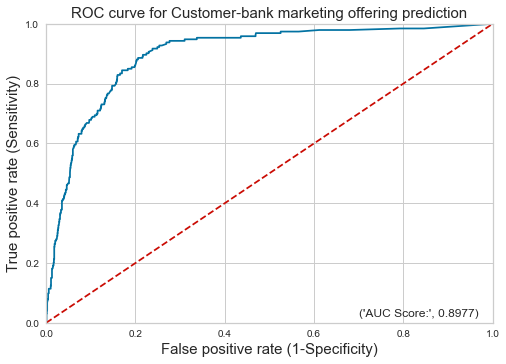

In [61]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=21,random_state=0)
rfc.fit(X_train, Y_train)
y_pred_rfc = rfc.predict(X_test)

#Evaluation metrics
print("F1 SCORE: RANDOM FOREST CLASSIFIER",f1_score(Y_test, y_pred_rfc))
print("Cohen Kappa: RANDOM FOREST CLASSIFIER",cohen_kappa_score(Y_test, y_pred_rfc))
print("CR Report: RANDOM FOREST CLASSIFIER \n",classification_report(Y_test, y_pred_rfc))
print("MCC: RANDOM FOREST CLASSIFIER",matthews_corrcoef(Y_test, y_pred_rfc))
print("Accuracy: RANDOM FOREST CLASSIFIER",accuracy_score(Y_test, y_pred_rfc))
print("Balanced Accuracy: RANDOM FOREST CLASSIFIER",balanced_accuracy_score(Y_test, y_pred_rfc))
print("Important features: RFC", rfc.feature_importances_)

f1scores['RANDOM FOREST CLASSIFIER']=f1_score(Y_test, y_pred_rfc)

#Cross Val Score
print("Cross Validation: RANDOM FOREST CLASSIFIER")
cross = cross_validate(rfc, X, y, cv=10, n_jobs=-1, verbose=1, scoring='f1')
print("Cross Val F1 score: RANDOM FOREST CLASSIFIER",cross['test_score'].mean())

#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_rfc)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#Roc curve
plot_roc(rfc)
plt.show()

# DECISION TREE

F1 SCORE: DECISION TREE 0.46808510638297873
Cohen Kappa: DECISION TREE 0.4084593357832722
CR Report: DECISION TREE 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1390
           1       0.57      0.40      0.47       193

    accuracy                           0.89      1583
   macro avg       0.74      0.68      0.70      1583
weighted avg       0.88      0.89      0.88      1583

Confusion Matrix: DECISION TREE 
 [[1331   59]
 [ 116   77]]
MCC: DECISION TREE 0.41625878825323853
Accuracy: DECISION TREE 0.8894504106127605
Balanced Accuracy: DECISION TREE 0.6782588437022403
Cross Validation: DECISION TREE
Cross Val F1 score: DECISION TREE 0.4376488287294052


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


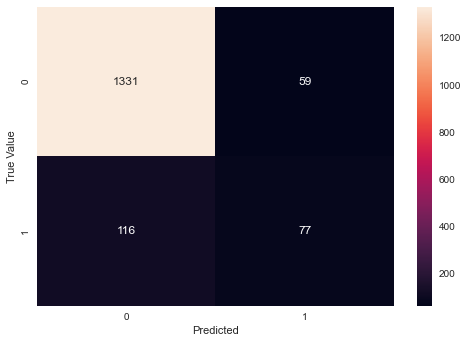

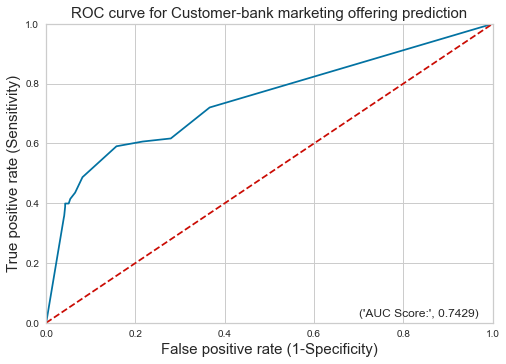

In [62]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=11, random_state=0)
dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

#Evaluation metrics
print("F1 SCORE: DECISION TREE",f1_score(Y_test, y_pred_dtc))
print("Cohen Kappa: DECISION TREE",cohen_kappa_score(Y_test, y_pred_dtc))
print("CR Report: DECISION TREE \n",classification_report(Y_test, y_pred_dtc))
print("Confusion Matrix: DECISION TREE \n",confusion_matrix(Y_test, y_pred_dtc))
print("MCC: DECISION TREE",matthews_corrcoef(Y_test, y_pred_dtc))
print("Accuracy: DECISION TREE",accuracy_score(Y_test, y_pred_dtc))
print("Balanced Accuracy: DECISION TREE",balanced_accuracy_score(Y_test, y_pred_dtc))

f1scores['DECISION TREE']=f1_score(Y_test, y_pred_dtc)

#Cross Val Score
print("Cross Validation: DECISION TREE")
cross = cross_validate(dtc, X, y, cv=10, n_jobs=-1, verbose=1, scoring='f1')
print("Cross Val F1 score: DECISION TREE",cross['test_score'].mean())

#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_dtc)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#ROC Curve
plot_roc(dtc)
plt.show()

# LOGISTIC REGRESSION

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


F1 SCORE: LOGISTIC REGRESSION 0.4181184668989547
Cohen Kappa: LOGISTIC REGRESSION 0.367613393072862
CR Report: LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1390
           1       0.64      0.31      0.42       193

    accuracy                           0.89      1583
   macro avg       0.77      0.64      0.68      1583
weighted avg       0.88      0.89      0.88      1583

MCC: LOGISTIC REGRESSION 0.396532439526747
Accuracy: LOGISTIC REGRESSION 0.8945041061276058
Balanced Accuracy: LOGISTIC REGRESSION 0.6432101986804339
Cross Validation: LOGISTIC REGRESSION
Cross Val F1 score: LOGISTIC REGRESSION 0.3155989753508529


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


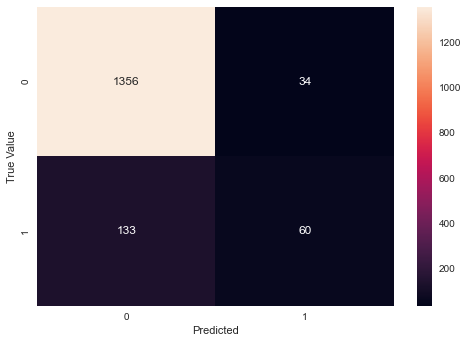

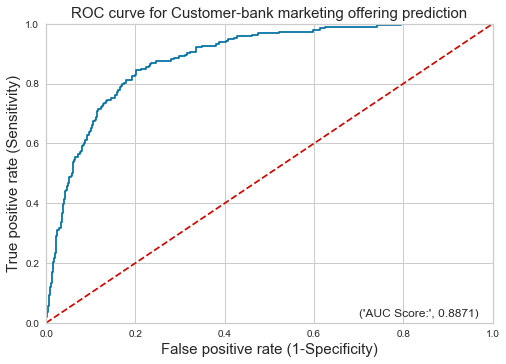

In [63]:
log_model = LogisticRegression(random_state=0, n_jobs=-1, verbose=1)
log_model.fit(X_train, Y_train)
y_pred_log = log_model.predict(X_test)

print("F1 SCORE: LOGISTIC REGRESSION",f1_score(Y_test, y_pred_log))
print("Cohen Kappa: LOGISTIC REGRESSION",cohen_kappa_score(Y_test, y_pred_log))
print("CR Report: LOGISTIC REGRESSION \n",classification_report(Y_test, y_pred_log))
print("MCC: LOGISTIC REGRESSION",matthews_corrcoef(Y_test, y_pred_log))
print("Accuracy: LOGISTIC REGRESSION",accuracy_score(Y_test, y_pred_log))
print("Balanced Accuracy: LOGISTIC REGRESSION",balanced_accuracy_score(Y_test, y_pred_log))

f1scores['LOGISTIC REGRESSION']=f1_score(Y_test, y_pred_log)

#Cross Val Score
print("Cross Validation: LOGISTIC REGRESSION")
cross = cross_validate(log_model, X, y, cv=10, n_jobs=-1, verbose=1, scoring='f1')
print("Cross Val F1 score: LOGISTIC REGRESSION",cross['test_score'].mean())

cm = confusion_matrix(Y_test, y_pred_log)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

plot_roc(log_model)
plt.show()


# NEURAL NETWORK

F1 SCORE: NEURAL NETWORK 0.47896440129449835
Cohen Kappa: NEURAL NETWORK 0.42646347308892796
CR Report: NEURAL NETWORK 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1390
           1       0.64      0.38      0.48       193

    accuracy                           0.90      1583
   macro avg       0.78      0.68      0.71      1583
weighted avg       0.88      0.90      0.89      1583

MCC: NEURAL NETWORK 0.443473268180323
Accuracy: NEURAL NETWORK 0.8982943777637398
Balanced Accuracy: NEURAL NETWORK 0.6766019308905208
Cross Validation: NEURAL NETWORK


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.7s remaining:    1.1s


Cross Val F1 score: NEURAL NETWORK 0.27871290663170256


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished


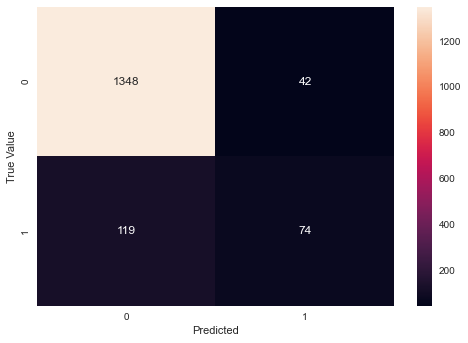

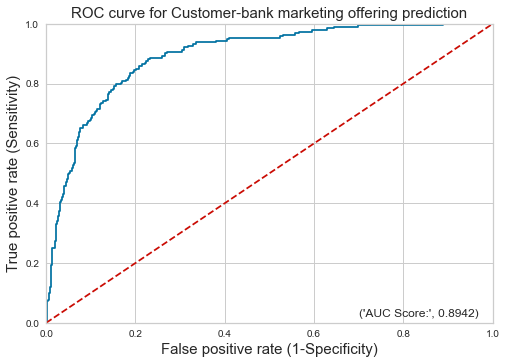

In [64]:
mlp = MLPClassifier(alpha=1, hidden_layer_sizes=[150], max_iter=1000, random_state=0)
mlp.fit(X_train, Y_train)
y_pred_mlp = mlp.predict(X_test)

print("F1 SCORE: NEURAL NETWORK",f1_score(Y_test, y_pred_mlp))
print("Cohen Kappa: NEURAL NETWORK",cohen_kappa_score(Y_test, y_pred_mlp))
print("CR Report: NEURAL NETWORK \n",classification_report(Y_test, y_pred_mlp))
print("MCC: NEURAL NETWORK",matthews_corrcoef(Y_test, y_pred_mlp))
print("Accuracy: NEURAL NETWORK",accuracy_score(Y_test, y_pred_mlp))
print("Balanced Accuracy: NEURAL NETWORK",balanced_accuracy_score(Y_test, y_pred_mlp))

f1scores['NEURAL NETWORK']=f1_score(Y_test, y_pred_mlp)

#Cross Val Score
print("Cross Validation: NEURAL NETWORK")
cross = cross_validate(mlp, X, y, cv=10, n_jobs=-1, verbose=1, scoring='f1')
print("Cross Val F1 score: NEURAL NETWORK",cross['test_score'].mean())

cm = confusion_matrix(Y_test, y_pred_mlp)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

plot_roc(mlp)
plt.show()

# CAT BOOST

F1 SCORE: CAT BOOST 0.43478260869565216
Cohen Kappa: CAT BOOST 0.3812988406594805
CR Report: CAT BOOST 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1390
           1       0.61      0.34      0.43       193

    accuracy                           0.89      1583
   macro avg       0.76      0.65      0.69      1583
weighted avg       0.88      0.89      0.88      1583

Confusion Matrix: CAT BOOST 
 [[1349   41]
 [ 128   65]]
MCC: CAT BOOST 0.40224712050910244
Accuracy: CAT BOOST 0.8932406822488945
Balanced Accuracy: CAT BOOST 0.6536455809445707


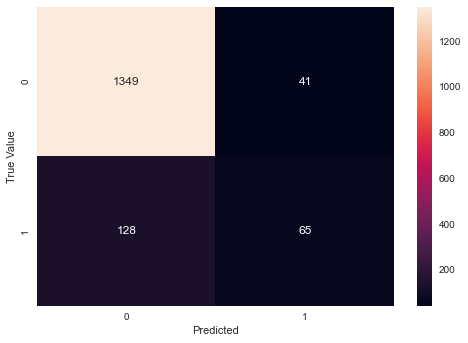

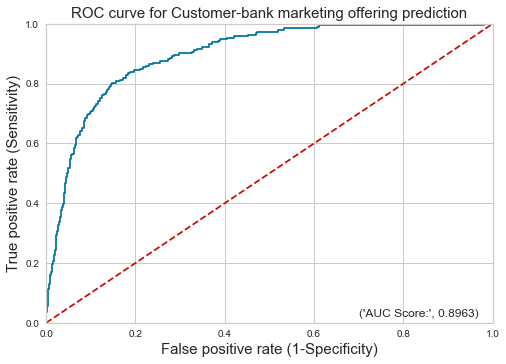

In [65]:
cat_model = CatBoostClassifier(silent=True , one_hot_max_size=2,loss_function='Logloss',boosting_type='Ordered', random_seed=25)
cat_model.fit(X_train, Y_train)
y_pred_cat = cat_model.predict(X_test)

print("F1 SCORE: CAT BOOST",f1_score(Y_test, y_pred_cat))
print("Cohen Kappa: CAT BOOST",cohen_kappa_score(Y_test, y_pred_cat))
print("CR Report: CAT BOOST \n",classification_report(Y_test, y_pred_cat))
print("Confusion Matrix: CAT BOOST \n",confusion_matrix(Y_test, y_pred_cat))
print("MCC: CAT BOOST",matthews_corrcoef(Y_test, y_pred_cat))
print("Accuracy: CAT BOOST",accuracy_score(Y_test, y_pred_cat))
print("Balanced Accuracy: CAT BOOST",balanced_accuracy_score(Y_test, y_pred_cat))

f1scores['CAT BOOST']=f1_score(Y_test, y_pred_cat)

cm = confusion_matrix(Y_test, y_pred_cat)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

plot_roc(cat_model)
plt.show()

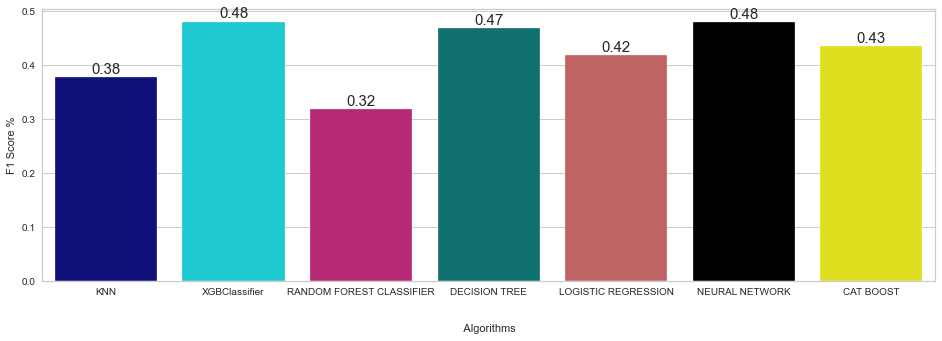

In [77]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black', 'yellow']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.ylabel("F1 Score %")
plt.xlabel("\n\n Algorithms")
plots = sns.barplot(x=list(f1scores.keys()), y=list(f1scores.values()), palette=colors)

for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 

plt.show()

## SMOTE

In [95]:
oversample = SMOTE()
undersample = RandomUnderSampler()

steps = [("o", oversample),("u", undersample)]
pipeline = Pipeline(steps= steps)

X2,y2 = pipeline.fit_resample(X,y)

X2.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new
0,30,1787,19,79,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,33,4789,11,220,1,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,35,1350,16,185,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,30,1476,3,199,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
4,59,0,5,226,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


In [96]:
X_trainS, X_testS, Y_trainS, Y_testS = train_test_split(X2,y2,test_size=0.35,random_state=0)

scaler = StandardScaler().fit(X_trainS)

X_trainS = pd.DataFrame(scaler.transform(X_trainS), columns = X.columns)
 
X_testS = pd.DataFrame(scaler.transform(X_testS), columns = X.columns)

f1scores_smote = {}
accuracies = {}

## KNN (AFTER SAMPLING)

F1 SCORE: KNN 0.9019189765458422
Cohen Kappa: KNN 0.8028558352682952
CR Report: KNN 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1399
           1       0.90      0.91      0.90      1401

    accuracy                           0.90      2800
   macro avg       0.90      0.90      0.90      2800
weighted avg       0.90      0.90      0.90      2800

MCC: KNN 0.8028853299481131
Accuracy: KNN 0.9014285714285715
Balanced Accuracy: KNN 0.9014254599109489


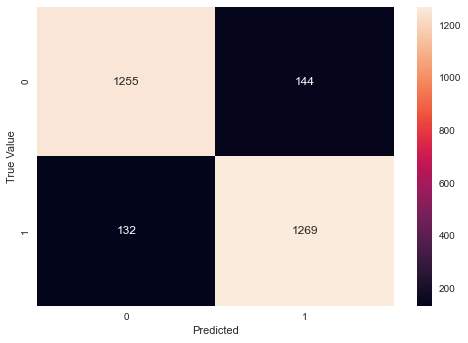

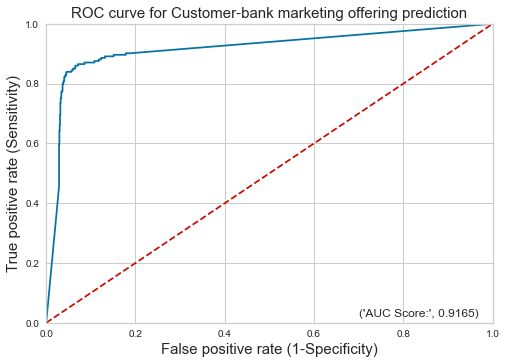

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.0s remaining:    2.6s


Cross Val F1 score: KNN 0.8685061365055139


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.6s finished


In [98]:
knnS = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2, p=11, weights='distance')
knnS.fit(X_trainS, Y_trainS)
y_pred_knnS = knnS.predict(X_testS)

print("F1 SCORE: KNN",f1_score(Y_testS, y_pred_knnS))
print("Cohen Kappa: KNN",cohen_kappa_score(Y_testS, y_pred_knnS))
print("CR Report: KNN \n",classification_report(Y_testS, y_pred_knnS))
print("MCC: KNN",matthews_corrcoef(Y_testS, y_pred_knnS))
print("Accuracy: KNN",accuracy_score(Y_testS, y_pred_knnS))
print("Balanced Accuracy: KNN",balanced_accuracy_score(Y_testS, y_pred_knnS))

f1scores_smote['KNN']=f1_score(Y_testS, y_pred_knnS)
accuracies['KNN']=accuracy_score(Y_testS, y_pred_knnS)

cmS = confusion_matrix(Y_testS, y_pred_knnS)
sns.heatmap(cmS, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

plot_roc(knnS)
plt.show()

#Cross Val Score
cross = cross_validate(knnS, X2, y2, cv=10, n_jobs=-1, verbose=1, scoring='f1')
print("Cross Val F1 score: KNN",cross['test_score'].mean())

## XGB

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 SCORE: XGBClassifier 0.9026043524794862
Cohen Kappa: XGBClassifier 0.8049998010202051
CR Report: XGBClassifier 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1399
           1       0.90      0.90      0.90      1401

    accuracy                           0.90      2800
   macro avg       0.90      0.90      0.90      2800
weighted avg       0.90      0.90      0.90      2800

MCC: XGBClassifier 0.8050000063777949
Accuracy: XGBClassifier 0.9025
Balanced Accuracy: XGBClassifier 0.9024996951529056
Cross Validation: XGBClassifier


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


Cross Val F1 score: XGBClassifier 0.9047814647702855


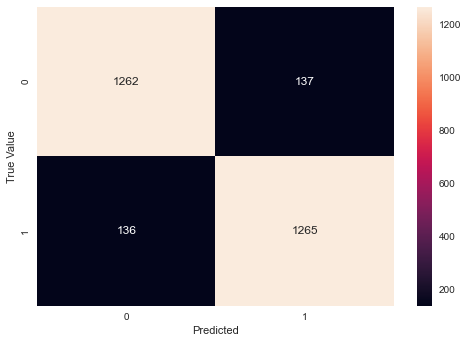

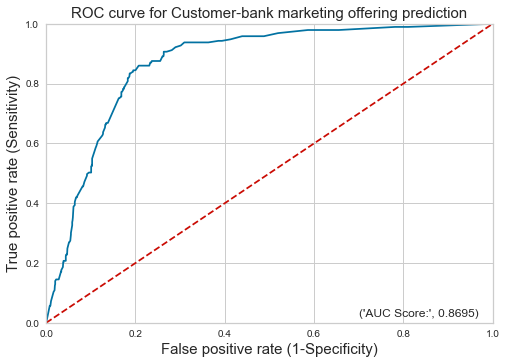

In [100]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgbS = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
                importance_type='gain', interaction_constraints='',
                learning_rate=0.001, max_delta_step=0, max_depth=20,
                min_child_weight=1, monotone_constraints='()',
                n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None)
model_xgbS.fit(X_trainS,Y_trainS)
y_pred_xgbS = model_xgbS.predict(X_testS)

#Evaluation metrics
print("F1 SCORE: XGBClassifier",f1_score(Y_testS, y_pred_xgbS))
print("Cohen Kappa: XGBClassifier",cohen_kappa_score(Y_testS, y_pred_xgbS))
print("CR Report: XGBClassifier \n",classification_report(Y_testS, y_pred_xgbS))
print("MCC: XGBClassifier",matthews_corrcoef(Y_testS, y_pred_xgbS))
print("Accuracy: XGBClassifier",accuracy_score(Y_testS, y_pred_xgbS))
print("Balanced Accuracy: XGBClassifier",balanced_accuracy_score(Y_testS, y_pred_xgbS))

f1scores_smote['XGBClassifier']=f1_score(Y_testS, y_pred_xgbS)
accuracies['XGBClassifier']=accuracy_score(Y_testS, y_pred_xgbS)

#Cross Val Score
print("Cross Validation: XGBClassifier")
cross = cross_validate(model_xgbS, X2, y2, cv=10, n_jobs=-1, verbose=1, scoring='f1')
print("Cross Val F1 score: XGBClassifier",cross['test_score'].mean())

#Confusion Matrix
cm = confusion_matrix(Y_testS, y_pred_xgbS)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#ROC Curve
plot_roc(model_xgbS)
plt.show()

## RANDOM FOREST CLASSIFIER (AFTER SAMPLING)

F1 SCORE: RANDOM FOREST CLASSIFIER 0.9399141630901287
Cohen Kappa: RANDOM FOREST CLASSIFIER 0.880000306121668
CR Report: RANDOM FOREST CLASSIFIER 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1399
           1       0.94      0.94      0.94      1401

    accuracy                           0.94      2800
   macro avg       0.94      0.94      0.94      2800
weighted avg       0.94      0.94      0.94      2800

MCC: RANDOM FOREST CLASSIFIER 0.8800083878272289
Accuracy: RANDOM FOREST CLASSIFIER 0.94
Balanced Accuracy: RANDOM FOREST CLASSIFIER 0.9400015000007653
Important features: RFC [0.0890806  0.09434577 0.08439519 0.27985687 0.04387261 0.03157709
 0.01234299 0.00437212 0.00378349 0.01110291 0.00922228 0.00554456
 0.00710639 0.00527253 0.01175865 0.00377248 0.0020403  0.01649832
 0.01250383 0.0146766  0.01541982 0.004274   0.00885278 0.02207414
 0.01197825 0.00252022 0.00937145 0.00458929 0.01230226 0.00930953
 0.01216029 0.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.4s remaining:    0.9s


Cross Val F1 score: RANDOM FOREST CLASSIFIER 0.9430130497926376


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished


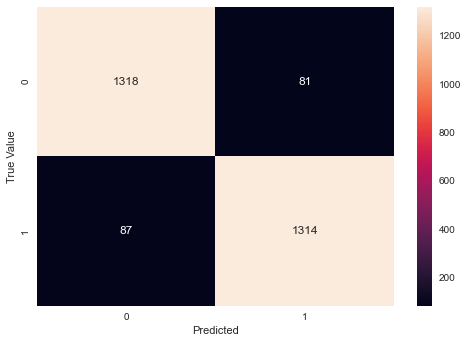

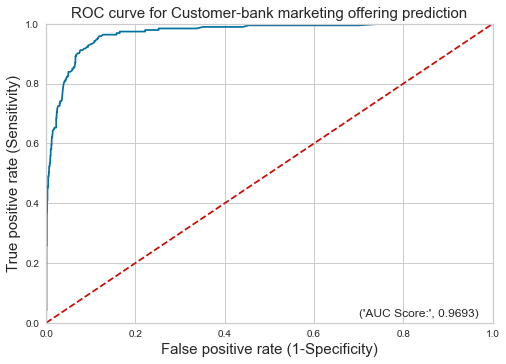

In [101]:
rfcS = RandomForestClassifier(criterion='entropy', max_depth=21,random_state=0)
rfcS.fit(X_trainS, Y_trainS)
y_pred_rfcS = rfcS.predict(X_testS)

#Evaluation metrics
print("F1 SCORE: RANDOM FOREST CLASSIFIER",f1_score(Y_testS, y_pred_rfcS))
print("Cohen Kappa: RANDOM FOREST CLASSIFIER",cohen_kappa_score(Y_testS, y_pred_rfcS))
print("CR Report: RANDOM FOREST CLASSIFIER \n",classification_report(Y_testS, y_pred_rfcS))
print("MCC: RANDOM FOREST CLASSIFIER",matthews_corrcoef(Y_testS, y_pred_rfcS))
print("Accuracy: RANDOM FOREST CLASSIFIER",accuracy_score(Y_testS, y_pred_rfcS))
print("Balanced Accuracy: RANDOM FOREST CLASSIFIER",balanced_accuracy_score(Y_testS, y_pred_rfcS))
print("Important features: RFC", rfc.feature_importances_)

f1scores_smote['RANDOM FOREST CLASSIFIER']=f1_score(Y_testS, y_pred_rfcS)
accuracies['RANDOM FOREST CLASSIFIER']=accuracy_score(Y_testS, y_pred_rfcS)

#Cross Val Score
print("Cross Validation: RANDOM FOREST CLASSIFIER")
cross = cross_validate(rfcS, X2, y2, cv=10, n_jobs=-1, verbose=1, scoring='f1')
print("Cross Val F1 score: RANDOM FOREST CLASSIFIER",cross['test_score'].mean())

#Confusion Matrix
cm = confusion_matrix(Y_testS, y_pred_rfcS)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#Roc curve
plot_roc(rfcS)
plt.show()

## DECISION TREE (AFTER SAMPLING)

F1 SCORE: DECISION TREE 0.901290547610743
Cohen Kappa: DECISION TREE 0.7978503357766129
CR Report: DECISION TREE 
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      1399
           1       0.88      0.92      0.90      1401

    accuracy                           0.90      2800
   macro avg       0.90      0.90      0.90      2800
weighted avg       0.90      0.90      0.90      2800

MCC: DECISION TREE 0.798711714613083
Accuracy: DECISION TREE 0.8989285714285714
Balanced Accuracy: DECISION TREE 0.8989119382203767
Cross Validation: DECISION TREE
Cross Val F1 score: DECISION TREE 0.9103160301232641


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


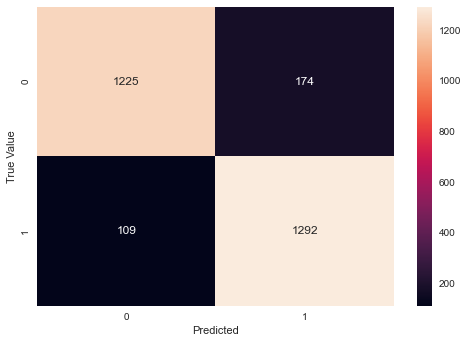

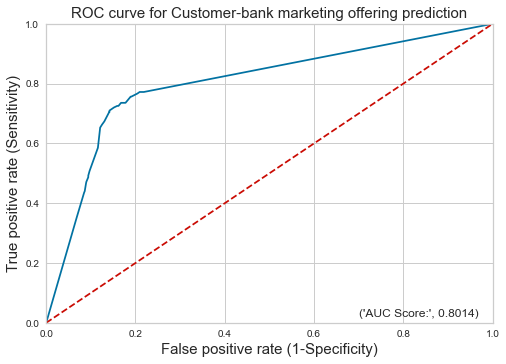

In [102]:
dtcS = DecisionTreeClassifier(criterion="entropy", max_depth=11, random_state=0)
dtcS.fit(X_trainS, Y_trainS)
y_pred_dtcS = dtcS.predict(X_testS)

#Evaluation metrics
print("F1 SCORE: DECISION TREE",f1_score(Y_testS, y_pred_dtcS))
print("Cohen Kappa: DECISION TREE",cohen_kappa_score(Y_testS, y_pred_dtcS))
print("CR Report: DECISION TREE \n",classification_report(Y_testS, y_pred_dtcS))
print("MCC: DECISION TREE",matthews_corrcoef(Y_testS, y_pred_dtcS))
print("Accuracy: DECISION TREE",accuracy_score(Y_testS, y_pred_dtcS))
print("Balanced Accuracy: DECISION TREE",balanced_accuracy_score(Y_testS, y_pred_dtcS))

f1scores_smote['DECISION TREE']=f1_score(Y_testS, y_pred_dtcS)
accuracies['DECISION TREE']=accuracy_score(Y_testS, y_pred_dtcS)

#Cross Val Score
print("Cross Validation: DECISION TREE")
cross = cross_validate(dtcS, X2, y2, cv=10, n_jobs=-1, verbose=1, scoring='f1')
print("Cross Val F1 score: DECISION TREE",cross['test_score'].mean())

#Confusion Matrix
cm = confusion_matrix(Y_testS, y_pred_dtcS)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

#ROC Curve
plot_roc(dtcS)
plt.show()

## LOGISTIC REGRESSION (AFTER SAMPLING)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


F1 SCORE: LOGISTIC REGRESSION 0.9291907514450868
Cohen Kappa: LOGISTIC REGRESSION 0.8600023571031712
CR Report: LOGISTIC REGRESSION 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1399
           1       0.94      0.92      0.93      1401

    accuracy                           0.93      2800
   macro avg       0.93      0.93      0.93      2800
weighted avg       0.93      0.93      0.93      2800

MCC: LOGISTIC REGRESSION 0.8602560737358762
Accuracy: LOGISTIC REGRESSION 0.93
Balanced Accuracy: LOGISTIC REGRESSION 0.930008637759509
Cross Validation: LOGISTIC REGRESSION


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


Cross Val F1 score: LOGISTIC REGRESSION 0.8898418743971181


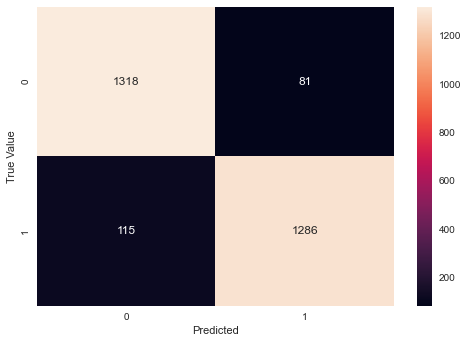

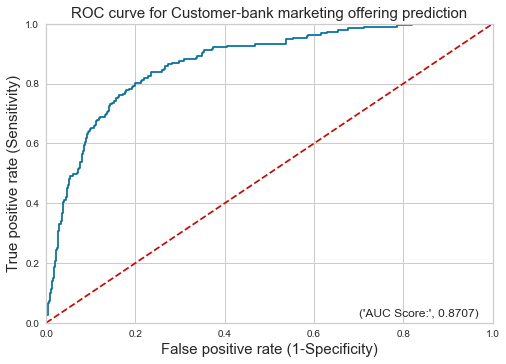

In [103]:
log_modelS = LogisticRegression(random_state=0, n_jobs=-1, verbose=1)
log_modelS.fit(X_trainS, Y_trainS)
y_pred_logS = log_modelS.predict(X_testS)

print("F1 SCORE: LOGISTIC REGRESSION",f1_score(Y_testS, y_pred_logS))
print("Cohen Kappa: LOGISTIC REGRESSION",cohen_kappa_score(Y_testS, y_pred_logS))
print("CR Report: LOGISTIC REGRESSION \n",classification_report(Y_testS, y_pred_logS))
print("MCC: LOGISTIC REGRESSION",matthews_corrcoef(Y_testS, y_pred_logS))
print("Accuracy: LOGISTIC REGRESSION",accuracy_score(Y_testS, y_pred_logS))
print("Balanced Accuracy: LOGISTIC REGRESSION",balanced_accuracy_score(Y_testS, y_pred_logS))

f1scores_smote['LOGISTIC REGRESSION']=f1_score(Y_testS, y_pred_logS)
accuracies['LOGISTIC REGRESSION']=accuracy_score(Y_testS, y_pred_logS)

#Cross Val Score
print("Cross Validation: LOGISTIC REGRESSION")
cross = cross_validate(log_modelS, X2, y2, cv=10, n_jobs=-1, verbose=1, scoring='f1')
print("Cross Val F1 score: LOGISTIC REGRESSION",cross['test_score'].mean())

cm = confusion_matrix(Y_testS, y_pred_logS)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

plot_roc(log_modelS)
plt.show()


## NEURAL NETWORK (AFTER SAMPLING)

F1 SCORE: NEURAL NETWORK 0.9348686577905722
Cohen Kappa: NEURAL NETWORK 0.870715736864178
CR Report: NEURAL NETWORK 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1399
           1       0.94      0.93      0.93      1401

    accuracy                           0.94      2800
   macro avg       0.94      0.94      0.94      2800
weighted avg       0.94      0.94      0.94      2800

MCC: NEURAL NETWORK 0.8708332602161081
Accuracy: NEURAL NETWORK 0.9353571428571429
Balanced Accuracy: NEURAL NETWORK 0.9353629772260088
Cross Validation: NEURAL NETWORK


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.3s remaining:    1.5s


Cross Val F1 score: NEURAL NETWORK 0.8158156796390461


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished


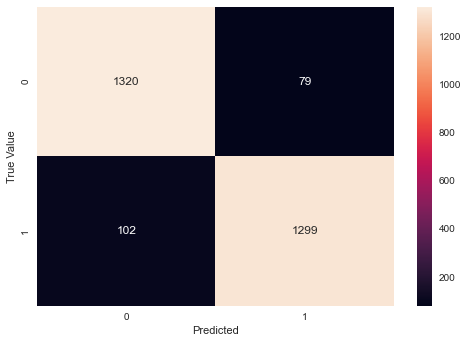

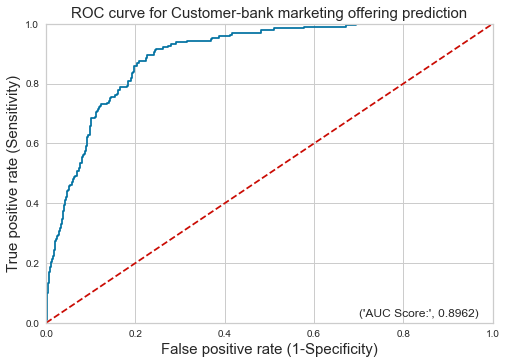

In [104]:
mlpS = MLPClassifier(alpha=1, hidden_layer_sizes=[150], max_iter=1000, random_state=0)
mlpS.fit(X_trainS, Y_trainS)
y_pred_mlpS = mlpS.predict(X_testS)

print("F1 SCORE: NEURAL NETWORK",f1_score(Y_testS, y_pred_mlpS))
print("Cohen Kappa: NEURAL NETWORK",cohen_kappa_score(Y_testS, y_pred_mlpS))
print("CR Report: NEURAL NETWORK \n",classification_report(Y_testS, y_pred_mlpS))
print("MCC: NEURAL NETWORK",matthews_corrcoef(Y_testS, y_pred_mlpS))
print("Accuracy: NEURAL NETWORK",accuracy_score(Y_testS, y_pred_mlpS))
print("Balanced Accuracy: NEURAL NETWORK",balanced_accuracy_score(Y_testS, y_pred_mlpS))

f1scores_smote['NEURAL NETWORK']=f1_score(Y_testS, y_pred_mlpS)
accuracies['NEURAL NETWORK']=accuracy_score(Y_testS, y_pred_mlpS)

#Cross Val Score
print("Cross Validation: NEURAL NETWORK")
cross = cross_validate(mlpS, X2, y2, cv=10, n_jobs=-1, verbose=1, scoring='f1')
print("Cross Val F1 score: NEURAL NETWORK",cross['test_score'].mean())

cm = confusion_matrix(Y_testS, y_pred_mlpS)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

plot_roc(mlpS)
plt.show()

## CAT BOOST (AFTER SAMPLING)

F1 SCORE: CAT BOOST 0.9389939350695683
Cohen Kappa: CAT BOOST 0.8778570182214471
CR Report: CAT BOOST 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1399
           1       0.94      0.94      0.94      1401

    accuracy                           0.94      2800
   macro avg       0.94      0.94      0.94      2800
weighted avg       0.94      0.94      0.94      2800

Confusion Matrix: CAT BOOST 
 [[1313   86]
 [  85 1316]]
MCC: CAT BOOST 0.8778572421651067
Accuracy: CAT BOOST 0.9389285714285714
Balanced Accuracy: CAT BOOST 0.9389282851674924


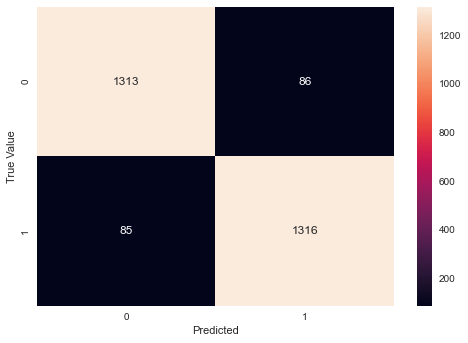

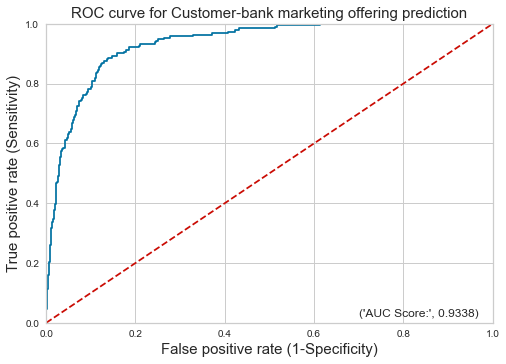

In [105]:
cat_modelS = CatBoostClassifier(silent=True , one_hot_max_size=2,loss_function='Logloss',boosting_type='Ordered', random_seed=25)
cat_modelS.fit(X_trainS, Y_trainS)
y_pred_catS = cat_modelS.predict(X_testS)

print("F1 SCORE: CAT BOOST",f1_score(Y_testS, y_pred_catS))
print("Cohen Kappa: CAT BOOST",cohen_kappa_score(Y_testS, y_pred_catS))
print("CR Report: CAT BOOST \n",classification_report(Y_testS, y_pred_catS))
print("Confusion Matrix: CAT BOOST \n",confusion_matrix(Y_testS, y_pred_catS))
print("MCC: CAT BOOST",matthews_corrcoef(Y_testS, y_pred_catS))
print("Accuracy: CAT BOOST",accuracy_score(Y_testS, y_pred_catS))
print("Balanced Accuracy: CAT BOOST",balanced_accuracy_score(Y_testS, y_pred_catS))

f1scores_smote['CAT BOOST']=f1_score(Y_testS, y_pred_catS)
accuracies['CAT BOOST']=accuracy_score(Y_testS, y_pred_catS)

cm = confusion_matrix(Y_testS, y_pred_catS)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

plot_roc(cat_modelS)
plt.show()

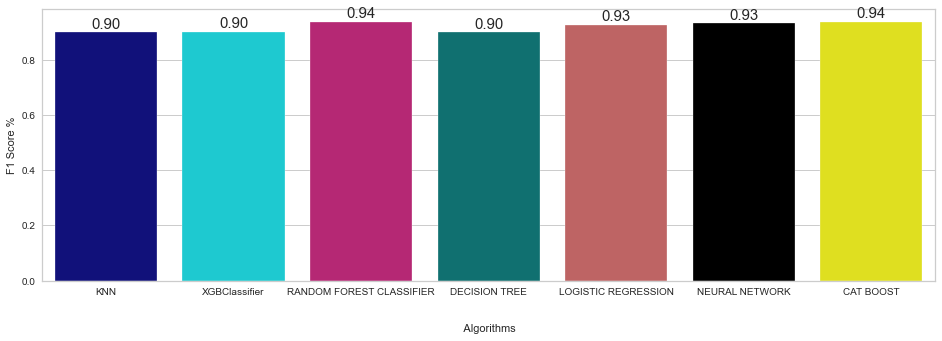

In [106]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black', 'yellow']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.ylabel("F1 Score %")
plt.xlabel("\n\n Algorithms")
plots = sns.barplot(x=list(f1scores_smote.keys()), y=list(f1scores_smote.values()), palette=colors)

for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 

plt.show()

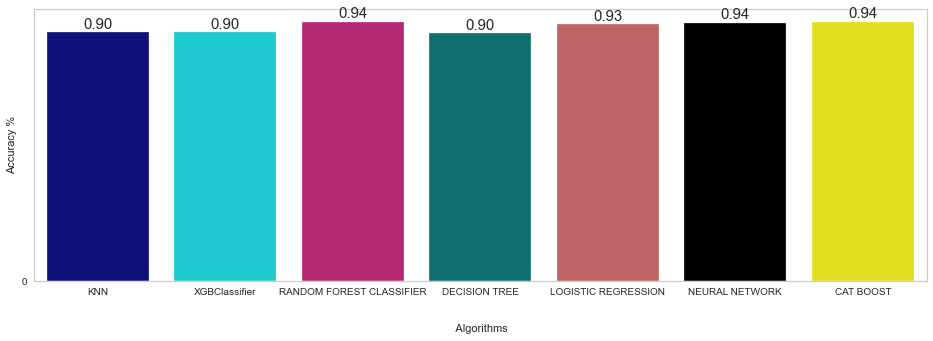

In [108]:
colors = ["#00008b", "#00e5ee", "#cd1076", "#008080","#cd5555",'black','yellow']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,3))
plt.ylabel("Accuracy %")
plt.xlabel("\n\n Algorithms")
plots = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), '.2f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=15, xytext=(0, 8), 
                   textcoords='offset points') 

plt.show()